## RUN THE FIRST CELL FIRST

In [10]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

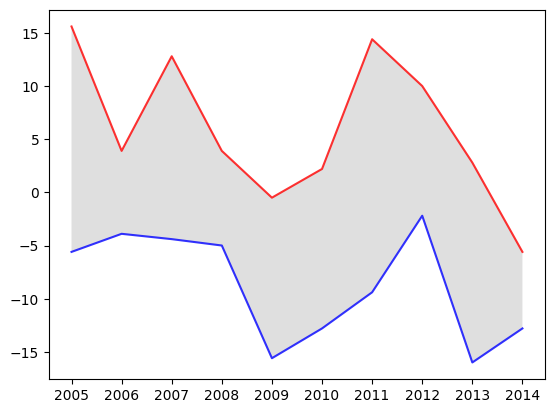

In [11]:
df = pd.read_csv('weatherdata.csv')
df = df[df['Date']<'2015']

maxs = df[df['Element']=='TMAX']
maxs = df[['Date','Data_Value']]
maxs = maxs.rename(columns = {'Data_Value':'TMAX'})
maxs['Date'] = pd.to_datetime(maxs['Date'])
maxs = maxs.sort_values(by='Date')

mins = df[df['Element']=='TMIN']
mins = df[['Date','Data_Value']]
mins = mins.rename(columns = {'Data_Value':'TMIN'})
mins['Date'] = pd.to_datetime(mins['Date'])
mins = mins.sort_values(by='Date')

maximums = []
minimums = []
years = []

for year in range(2005,2015):
    filter = maxs["Date"]==str(year)
    years.append(str(year))

    local_max = np.max(maxs.where(filter)['TMAX'])
    maximums.append(local_max*0.1)
    local_min = np.min(mins.where(filter)['TMIN'])
    minimums.append(local_min*0.1)


plt.plot(years,maximums,'-',c='red',alpha=0.8)
plt.plot(years,minimums,'-',c='blue',alpha=0.8)
plt.gca().fill_between(range(len(years)),
                        minimums,maximums,
                        facecolor='grey',
                        alpha=0.25)

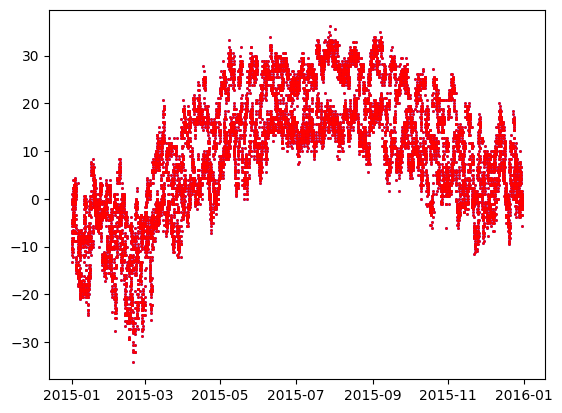

In [12]:
df_2015 = pd.read_csv('weatherdata.csv')
df_2015 = df_2015[df_2015['Date']>'2015']

maxs_2015 = df_2015[df_2015['Element']=='TMAX']
maxs_2015 = df_2015[['Date','Data_Value']]
maxs_2015 = maxs_2015.rename(columns = {'Data_Value':'TMAX'})
maxs_2015['Date'] = pd.to_datetime(maxs_2015['Date'])
maxs_2015 = maxs_2015.sort_values(by='Date')
maxs_2015['TMAX'] = maxs_2015['TMAX'].apply(lambda x: x*0.1)

mins_2015 = df_2015[df_2015['Element']=='TMIN']
mins_2015 = df_2015[['Date','Data_Value']]
mins_2015 = mins_2015.rename(columns = {'Data_Value':'TMIN'})
mins_2015['Date'] = pd.to_datetime(mins_2015['Date'])
mins_2015 = mins_2015.sort_values(by='Date')
mins_2015['TMIN'] = mins_2015['TMIN'].apply(lambda x: x*0.1)

plt.scatter(list(mins_2015['Date']),list(mins_2015['TMIN']),s=1,c='blue')
plt.scatter(list(maxs_2015['Date']),list(maxs_2015['TMAX']),s=1,c='red')